In [32]:
import pandas_datareader as pdr
import pandas as pd
import yfinance as yf
import statsmodels.api as sms
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [3]:
df_meta = yf.download('META')
print(df_meta.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-23  489.839996  495.220001  487.720001  488.690002  488.690002   
2024-07-24  472.309998  476.299988  460.579987  461.269989  461.269989   
2024-07-25  463.260010  463.549988  442.649994  453.410004  453.410004   
2024-07-26  464.200012  469.769989  459.420013  465.700012  465.700012   
2024-07-29  470.434998  473.959991  465.019989  465.709991  465.709991   

              Volume  
Date                  
2024-07-23   9455500  
2024-07-24  17649700  
2024-07-25  18240500  
2024-07-26  14209300  
2024-07-29  10526831  


<Axes: xlabel='Date'>

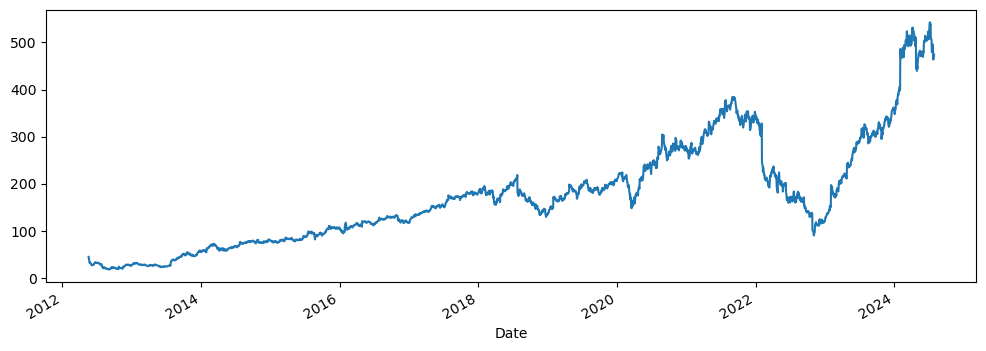

In [4]:
df_meta['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

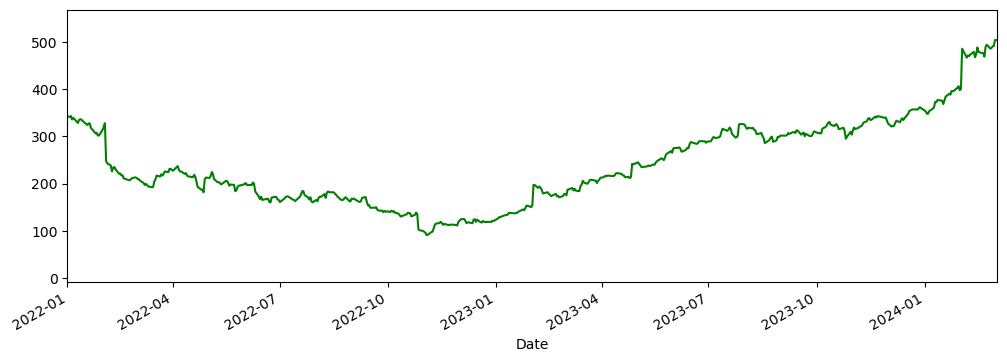

In [5]:
## xlimit and ylimit
df_meta['High'].plot(xlim = ['2022-01-01','2024-03-03'],figsize=(12,4),c='green')

In [6]:
index = df_meta.loc['2022-01-01':'2022-02-02'].index
market_open = df_meta.loc['2022-01-01':'2022-02-02']['Open']

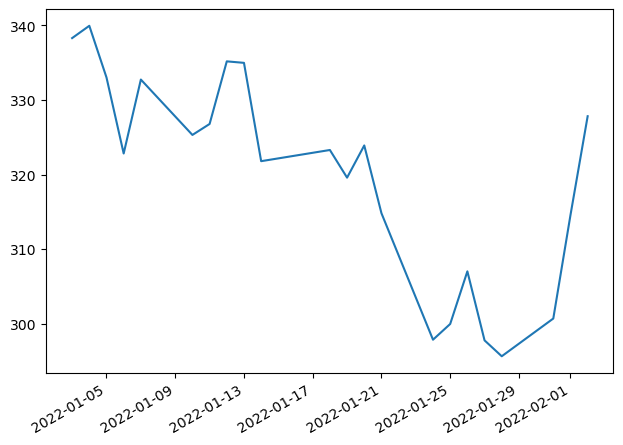

In [7]:
figure,axis = plt.subplots()
plt.tight_layout()
#for overlapping
figure.autofmt_xdate()
axis.plot(index,market_open)

In [8]:
df_meta.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-19',
               '2024-07-22', '2024-07-23', '2024-07-24', '2024-07-25',
               '2024-07-26', '2024-07-29'],
              dtype='datetime64[ns]', name='Date', length=3067, freq=None)

In [9]:
df_meta = df_meta.reset_index()

In [10]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3067 non-null   datetime64[ns]
 1   Open       3067 non-null   float64       
 2   High       3067 non-null   float64       
 3   Low        3067 non-null   float64       
 4   Close      3067 non-null   float64       
 5   Adj Close  3067 non-null   float64       
 6   Volume     3067 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 167.9 KB


In [11]:
df_meta['Date']=pd.to_datetime(df_meta['Date'])

In [12]:
df_meta.set_index('Date', inplace=True)

In [13]:
df_meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200


In [14]:
datetime.now()

datetime.datetime(2024, 7, 29, 19, 38, 46, 448573)

In [15]:
 df_meta.resample(rule='A').min()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,18.080000,18.270000,17.549999,17.730000,17.693640,8108300
2013-12-31,22.990000,23.090000,22.670000,22.900000,22.853037,10404400
2014-12-31,54.020000,54.939999,51.849998,53.529999,53.420223,7685500
2015-12-31,74.040001,74.830002,72.000000,74.050003,73.898148,5913100
2016-12-31,92.830002,95.000000,89.370003,94.160004,93.966904,8658600
2017-12-31,116.029999,117.839996,115.510002,116.860001,116.620354,8190300
2018-12-31,123.099998,129.740005,123.019997,124.059998,123.805580,9588600
2019-12-31,128.990005,137.169998,128.559998,131.740005,131.469833,6046300
2020-12-31,139.750000,148.179993,137.100006,146.009995,145.710571,6702000


In [16]:
df_meta.resample(rule='A').max()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,42.049999,45.000000,38.000000,38.230000,38.151604,573576400
2013-12-31,58.320000,58.580002,57.369999,57.959999,57.841137,365457900
2014-12-31,82.019997,82.169998,80.750000,81.449997,81.282967,150178900
2015-12-31,108.800003,110.650002,108.000000,109.010002,108.786453,86211300
2016-12-31,133.500000,133.500000,132.220001,133.279999,133.006668,107475300
2017-12-31,183.509995,184.250000,182.089996,183.029999,182.654648,68910700
2018-12-31,215.720001,218.619995,214.270004,217.500000,217.053970,169803700
2019-12-31,208.669998,208.929993,206.589996,208.100006,207.673264,77233600
2020-12-31,300.160004,304.670013,293.049988,303.910004,303.286774,76343900


<Axes: xlabel='Date'>

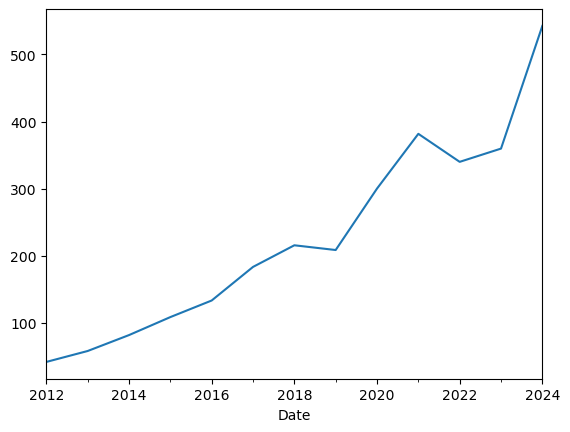

In [17]:
#Rule A : Year end Frequency
df_meta.resample(rule='A').max()['Open'].plot()


<Axes: xlabel='Date'>

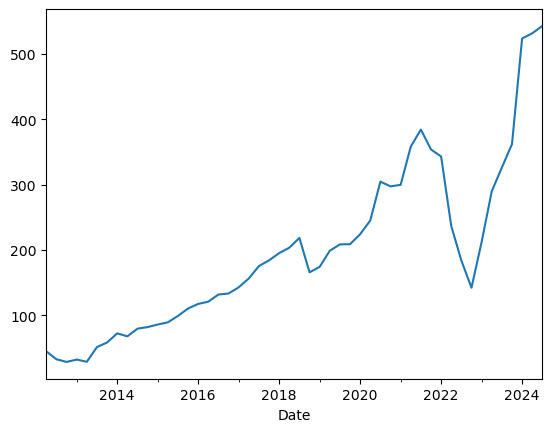

In [18]:
#quarterly
df_meta.resample(rule='QS').max()['High'].plot()

<Axes: xlabel='Date'>

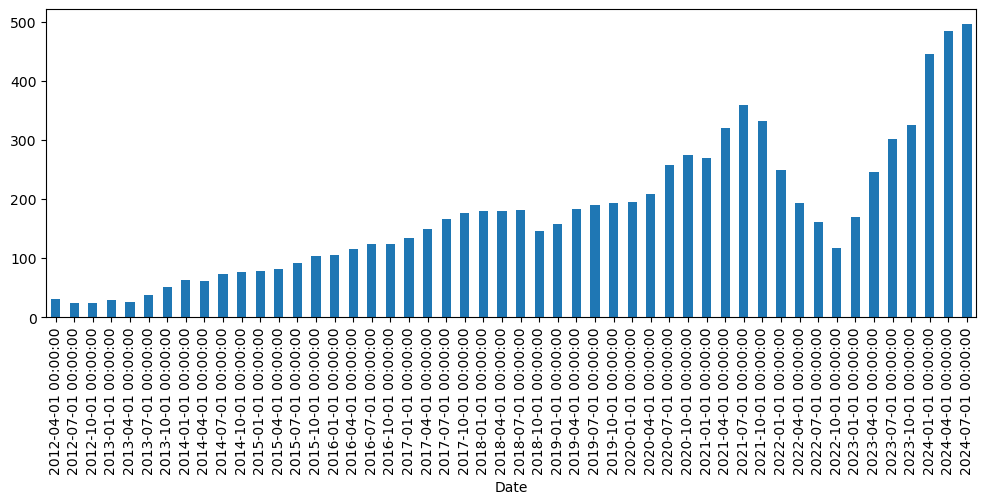

In [19]:
df_meta['Open'].resample(rule='QS').mean().plot(kind='bar',figsize=(12,4))

In [20]:
#rolling mean
df_meta['High'].rolling(7).mean().head(20)

Date
2012-05-18          NaN
2012-05-21          NaN
2012-05-22          NaN
2012-05-23          NaN
2012-05-24          NaN
2012-05-25          NaN
2012-05-29    35.085714
2012-05-30    32.878571
2012-05-31    31.880000
2012-06-01    31.245714
2012-06-04    30.552857
2012-06-05    29.774286
2012-06-06    28.948571
2012-06-07    28.328571
2012-06-08    28.072857
2012-06-11    27.844286
2012-06-12    27.647143
2012-06-13    27.711429
2012-06-14    27.791429
2012-06-15    28.210000
Name: High, dtype: float64

In [21]:
df_meta['Open: 7days Rolling'] = df_meta['Open'].rolling(7).mean()
df_meta.head(10)

,Open,High,Low,Close,Adj Close,Volume,Open: 7days Rolling
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,NaN
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,NaN
2012-05-25,32.900002,32.950001,31.110001,31.910000,31.844563,37149800,NaN
2012-05-29,31.480000,31.690001,28.650000,28.840000,28.780857,78063400,34.270000
2012-05-30,28.700001,29.549999,27.860001,28.190001,28.132191,57267900,32.362858
2012-05-31,28.549999,29.670000,26.830000,29.600000,29.539299,111639200,31.222858


In [22]:
df_meta['Open: 30days Rolling'] = df_meta['Open'].rolling(30).mean()

In [23]:
df_meta

,Open,High,Low,Close,Adj Close,Volume,Open: 7days Rolling,Open: 30days Rolling
Date,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,NaN,NaN
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,NaN,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,NaN,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-07-23,489.839996,495.220001,487.720001,488.690002,488.690002,9455500,486.682857,504.278334
2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,482.922856,503.560001
2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,477.460000,502.330001


<Axes: xlabel='Date'>

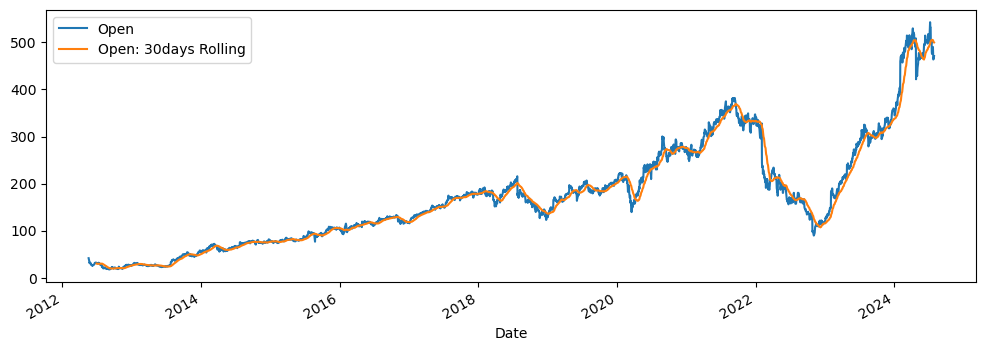

In [24]:
# Also an example of smoothening
df_meta[['Open','Open: 30days Rolling']].plot(figsize=(12,4))

<Axes: xlabel='Date'>

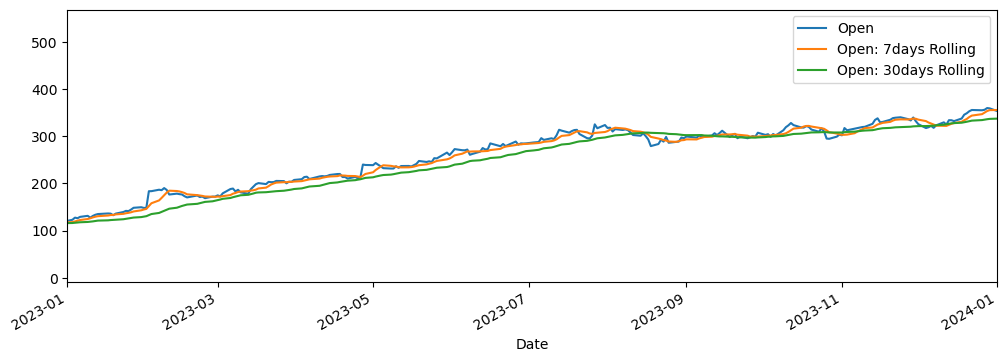

In [25]:
# Simple Moving Average
df_meta[['Open','Open: 7days Rolling','Open: 30days Rolling']].plot(xlim=['2023-01-01','2024-01-01'],figsize=(12,4))


<Axes: xlabel='Date'>

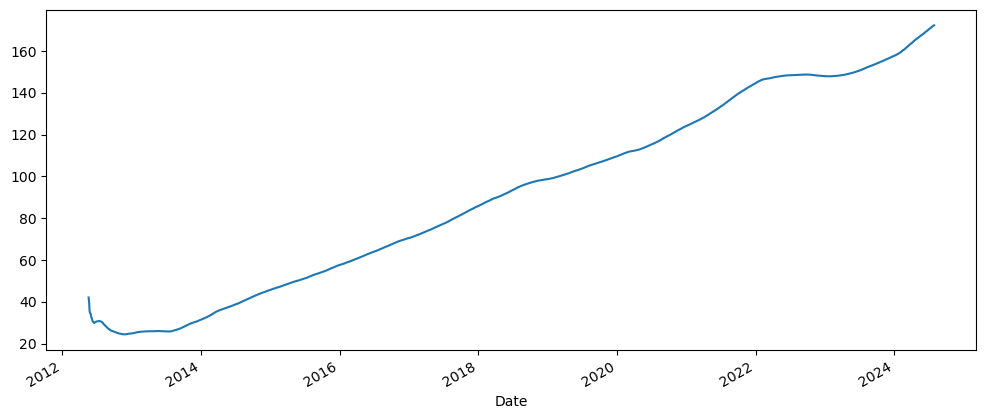

In [26]:
## Expanding -> Cumulative Moving Average
df_meta['Open'].expanding().mean().plot(figsize=(12,5))

In [27]:
## Exponential Moving Average
df_meta['EMA_0.1']=df_meta['Open'].ewm(alpha = 0.1,adjust= False).mean()

<Axes: xlabel='Date'>

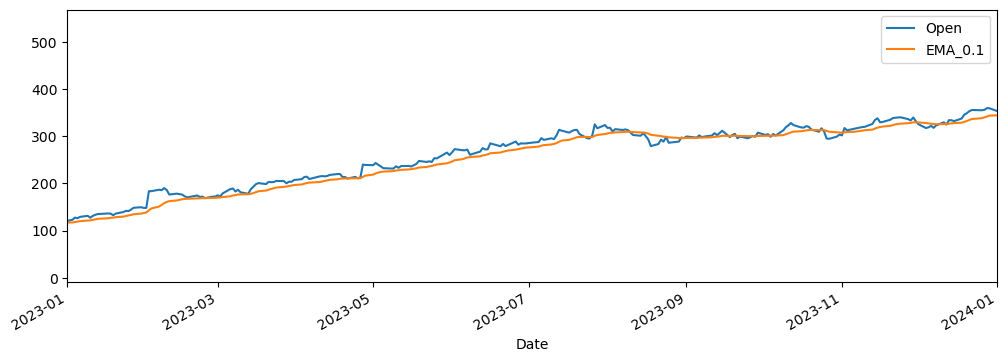

In [28]:
df_meta[['Open','EMA_0.1']].plot(xlim=['2023-01-01','2024-01-01'],figsize=(12,4))


In [29]:
## Exponenetial Weighted Moving Average
# EWMA(t) = a(t) * x(t) + (1-a) * EWMA(t-1) where a is weight
df_meta['EWMA_5days']=df_meta['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

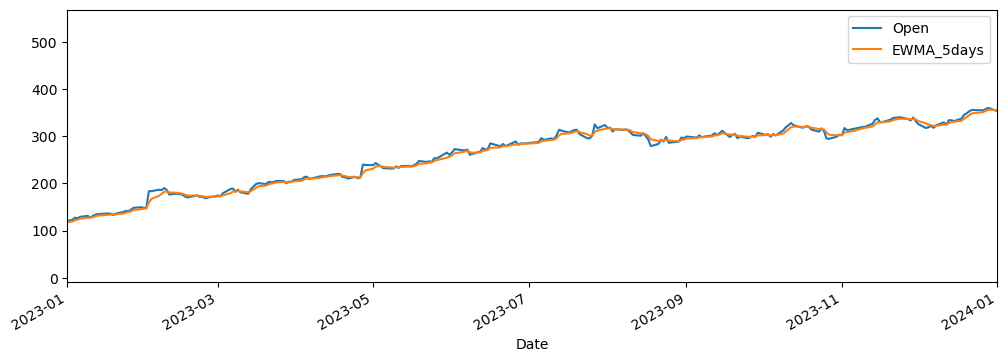

In [30]:
df_meta[['Open','EWMA_5days']].plot(xlim=['2023-01-01','2024-01-01'],figsize=(12,4))


<Axes: xlabel='Date'>

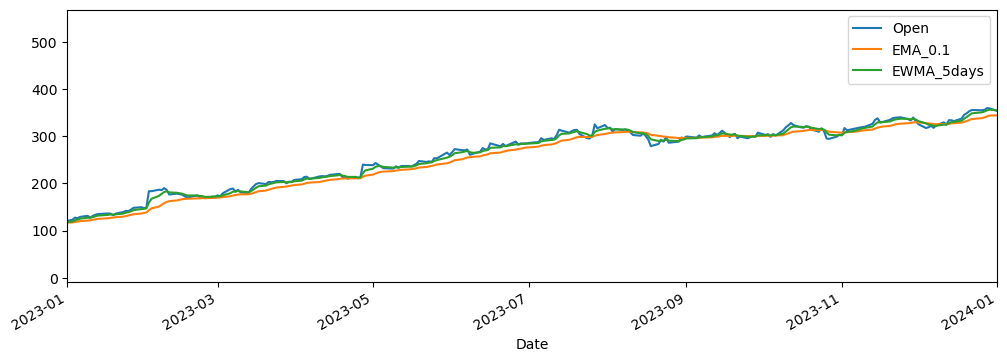

In [31]:
# EMA vs EWMA
df_meta[['Open','EMA_0.1','EWMA_5days']].plot(xlim=['2023-01-01','2024-01-01'],figsize=(12,4))


In [36]:
df_meta


,Open,High,Low,Close,Adj Close,Volume,Open: 7days Rolling,Open: 30days Rolling,EMA_0.1,EWMA_5days
Date,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN,NaN,42.049999,42.049999
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,NaN,NaN,41.497999,38.737999
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,NaN,NaN,40.609199,35.835263
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,NaN,NaN,39.685279,33.980462
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,NaN,NaN,39.011752,33.584882
...,...,...,...,...,...,...,...,...,...,...
2024-07-23,489.839996,495.220001,487.720001,488.690002,488.690002,9455500,486.682857,504.278334,498.022234,487.313281
2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,482.922856,503.560001,495.451011,482.312186
2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,477.460000,502.330001,492.231911,475.961461


In [37]:
from statsmodels.tsa.stattools import adfuller

In [46]:
def adf_test(series):
    result = adfuller(series)
    print('ADF statistics: {}'.format(result[0]))
    print('P-value: {}'.format(result[1]))
    if(result[1]<= 0.5):
        print("Strong Evidence")
    else:
        print('Weak Evidence')

In [47]:
adf_test(df_meta['Close'])


ADF statistics: 0.15278611724407615
P-value: 0.969485659181433
Weak Evidence


In [51]:
df_meta['Close Difference'] = df_meta['Close'] - df_meta['Close'].shift(1)
df_meta.head()

,Open,High,Low,Close,Adj Close,Volume,Open: 7days Rolling,Open: 30days Rolling,EMA_0.1,EWMA_5days,Close Difference
Date,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN,NaN,42.049999,42.049999,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,NaN,NaN,41.497999,38.737999,-4.200001
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,NaN,NaN,40.609199,35.835263,-3.029999
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,NaN,NaN,39.685279,33.980462,1.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,NaN,NaN,39.011752,33.584882,1.029999


In [64]:
df_meta['Close Year Difference'] = df_meta['Close'] - df_meta['Close'].shift(12)
df_meta.head()

,Open,High,Low,Close,Adj Close,Volume,Open: 7days Rolling,Open: 30days Rolling,EMA_0.1,EWMA_5days,Close Difference,Close Year Difference
Date,,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN,NaN,42.049999,42.049999,0.000000,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,NaN,NaN,41.497999,38.737999,-4.200001,NaN
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,NaN,NaN,40.609199,35.835263,-3.029999,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,NaN,NaN,39.685279,33.980462,1.000000,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,NaN,NaN,39.011752,33.584882,1.029999,NaN


In [58]:
diff = df_meta['Close Difference'].dropna()
adf_test(diff)

ADF statistics: -18.865996610215085
P-value: 0.0
Strong Evidence


In [61]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
df_meta['Close Difference'].fillna(0, inplace=True)

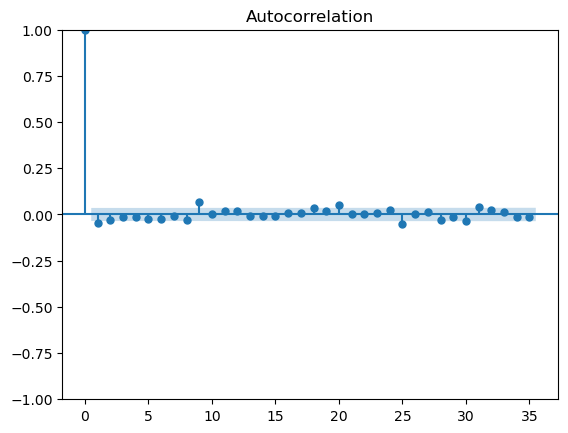

In [63]:
acf = plot_acf(df_meta['Close Difference'])


ADF statistics: -7.765724566872982
P-value: 9.199554554127679e-12
Strong Evidence


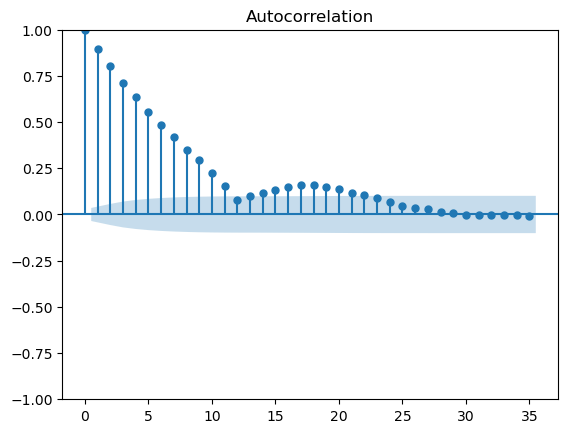

In [67]:
## 12 months
diff = df_meta['Close Year Difference'].dropna()
adf_test(diff)
df_meta['Close Year Difference'].fillna(0, inplace=True)
acf = plot_acf(df_meta['Close Year Difference'])

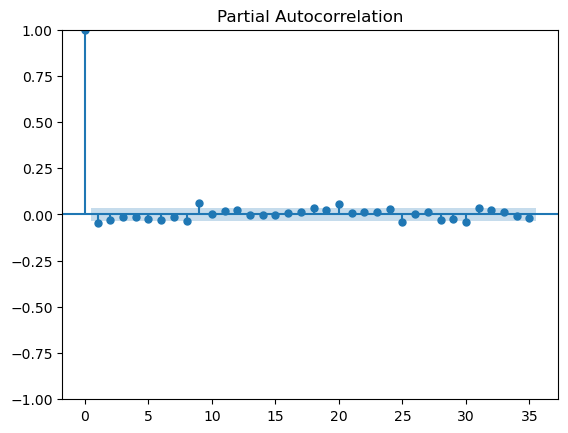

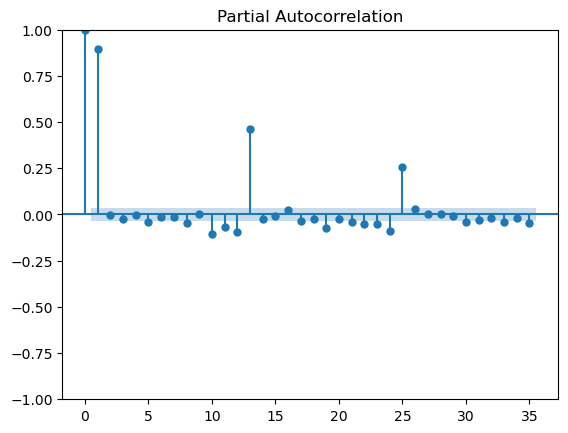

In [70]:
result = plot_pacf(df_meta['Close Difference'])
##yearly
yearly_result = plot_pacf(df_meta['Close Year Difference'])

In [71]:
df_meta

,Open,High,Low,Close,Adj Close,Volume,Open: 7days Rolling,Open: 30days Rolling,EMA_0.1,EWMA_5days,Close Difference,Close Year Difference
Date,,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN,NaN,42.049999,42.049999,0.000000,0.000000
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,NaN,NaN,41.497999,38.737999,-4.200001,0.000000
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,NaN,NaN,40.609199,35.835263,-3.029999,0.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,NaN,NaN,39.685279,33.980462,1.000000,0.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,NaN,NaN,39.011752,33.584882,1.029999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-23,489.839996,495.220001,487.720001,488.690002,488.690002,9455500,486.682857,504.278334,498.022234,487.313281,1.290009,-51.219971
2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,482.922856,503.560001,495.451011,482.312186,-27.420013,-68.050018
2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,477.460000,502.330001,492.231911,475.961461,-7.859985,-76.589996


In [73]:
from datetime import timedelta, datetime
train_dataset = datetime(2018,12,1)
test_dataset = datetime(2024,7,9)

In [74]:
train_data = df_meta[:train_dataset]
test_data = df_meta[train_dataset+timedelta(days=1):test_dataset]

In [75]:
pred_start_date = train_data.index[0]
pred_end_date = test_data.index[-1]

In [76]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Open: 7days Rolling,Open: 30days Rolling,EMA_0.1,EWMA_5days,Close Difference,Close Year Difference
Date,,,,,,,,,,,,
2018-12-03,143.000000,143.679993,140.759995,141.089996,140.800659,24819200,136.551426,143.909000,140.352256,138.624276,0.479996,-3.130005
2018-12-04,140.729996,143.389999,137.160004,137.929993,137.647141,30307400,137.562855,143.441334,140.390030,139.326182,-3.160004,-5.920013
2018-12-06,133.820007,139.699997,133.669998,139.630005,139.343674,28218100,137.679999,142.861334,139.733028,137.490791,1.700012,0.100006
2018-12-07,139.250000,140.869995,136.660004,137.419998,137.138184,21195500,138.179999,142.360334,139.684725,138.077194,-2.210007,5.869995
2018-12-10,139.600006,143.050003,139.009995,141.850006,141.559113,26422200,138.654286,142.089334,139.676253,138.584798,4.430008,9.420013
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-02,500.760010,510.500000,499.450012,509.500000,509.500000,7739500,505.715720,490.780334,499.771867,505.752997,4.820007,5.399994
2024-07-03,506.369995,511.279999,506.019989,509.959991,509.959991,6005600,506.740003,491.994334,500.431680,505.958663,0.459991,5.799988
2024-07-05,511.600006,540.869995,511.600006,539.909973,539.909973,21354100,508.818577,493.477001,501.548512,507.839111,29.949982,33.279968


In [88]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
train_data

,Open,High,Low,Close,Adj Close,Volume,Open: 7days Rolling,Open: 30days Rolling,EMA_0.1,EWMA_5days,Close Difference,Close Year Difference
Date,,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN,NaN,42.049999,42.049999,0.000000,0.000000
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,NaN,NaN,41.497999,38.737999,-4.200001,0.000000
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,NaN,NaN,40.609199,35.835263,-3.029999,0.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,NaN,NaN,39.685279,33.980462,1.000000,0.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,NaN,NaN,39.011752,33.584882,1.029999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,133.000000,137.000000,132.779999,136.380005,136.100327,24263600,135.584285,147.023667,141.844853,134.400605,4.650009,-15.149994
2018-11-27,135.750000,136.610001,133.710007,135.000000,134.723145,20750300,134.644285,146.438000,141.235367,134.850404,-1.380005,-12.869995
2018-11-28,136.279999,136.789993,131.850006,136.759995,136.479538,29847500,133.959998,145.800667,140.739830,135.326935,1.759995,-8.200012


In [94]:
model_ARIMA = ARIMA(train_data['Close Difference'], order=(14,2,10))
model_fit = model_ARIMA.fit()

/Users/hemanth/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hemanth/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hemanth/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hemanth/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inver

In [95]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Close Difference   No. Observations:                 1646
Model:               ARIMA(14, 2, 10)   Log Likelihood               -3564.826
Date:                Tue, 30 Jul 2024   AIC                           7179.652
Time:                        01:09:19   BIC                           7314.774
Sample:                             0   HQIC                          7229.759
                               - 1646                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.6154      0.154    -23.455      0.000      -3.918      -3.313
ar.L2         -7.8035      0.457    -17.078      0.000      -8.699      -6.908
ar.L3        -11.5519      0.867    -13.319      0.0